# Interpretable Machine Learning
## Exercise Sheet: 6
## This exercise sheet covers chapters 8.6 and 9.1 from the IML book by Christoph Molnar

Kristin Blesch (blesch@leibniz-bips.de)<br>
Niklas Koenen (koenen@leibniz-bips.de)
<hr style="border:1.5px solid gray"> </hr>

# 1) Global Surrogate

**a)** Explain the method 'Global Surrogate' and give an example.  

**Solution:**

##* Global surrogate method is an interpretable ML model trained with the purpose of interpreating the outcome of a black box model. The main purpose is to assure the accurate approximation for the outcome of the black box model while as well retain the interpretability power. Can also be termed as an approximation model/ meta-model/ emulator or response surface model.

##* The general idea is to approximate the black box prediction function (f) using the surrogate prediction function (g) under the restriction that "g" is interpretable. The function "g" can be any sparse model like decission tree or regression.
##* Since the surrogate model doesnot require the structure of the black box model in training, it is a model agnostic method. The steps to train a surrogate model include:- data selection (can be same data used to train a black box model or a sample from the particular distribution/ the data),get the prediction of the black box model on the selected data, select the surrogate model and train using the data and the black box predictions,measure the performance of the surrogate model in approximating the outcome of the black box model (can be MSE/MAE etc) and finally interpretating the surrogate model.

**b)** How can we measure the performance of a global surrogate. What is the consequence if the model performs very bad but the surrogate very good?  

**Solution:**

##* The global performance of the surrogate model can be meassured using the coefficient of determination (R-squared value). This quantity display the amount of variation that is explained by the surrogate model. If R-squared value is close to 1 then the surrogate model is the good approximation to black box model and vice-versa. If the surrogate model is very good but on a very poor black box model, results will be good for nothing althogh the surrogate model doesn't care about the real world (surrogate model only care about the outcomes of the black box model).

# 2) Individual Conditional Expectation (ICE)

**a)** What is an individual conditional expectation (ICE) plot and what is its relation to the PDP? Also explain the variants c-ICE and d-ICE and their advantages.

**Solution:**

## * Individual conditional expectation (ICE) plot is a local model agnostic tool that explain how the individual (an instance) prediction changes when a feature varies. The ICE plot vissualize the dependence of a prediction on a feature for each instance separately resulting into a single line per feature while the PDP shows the average effect of a feature.
##* Since it may be difficult to tell the difference in the ICE curves between individual, it is a good idea to center the curves at a certain point in the feature (the lower end of the feature as an anchor is a good choice) and display only the difference in prediction to this point. This procidure results to the so called centered ICE plot (c-ICE plot). To sport heterogenity much more easily the derivative ICE (d-ICE) is of great help. This help to cite the changes whenever they occurs and their respective directions (+ve or -ve). Using d-ICE it is easy to sport ranges of feature values where the prediction of the black box model varies for at least some instances.

**b)** We again consider the example from Sheet 4 Task 1, but in this case we train a decision tree via gradient boosting. Execute the following code, which is almost identical to the one in Sheet 4, only with a gradient boosting machine:

In [44]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Get data
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

# Get train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Train model and calculate R²-score
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(random_state = 42)
model.fit(X_train, y_train)
print(f"Test R2 score: {model.score(X_test, y_test):.2f}")

Test R2 score: 0.85


Now create the ICE plot for each feature using the already known function [`PartialDependenceDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn-inspection-partialdependencedisplay).  

**Solution:**

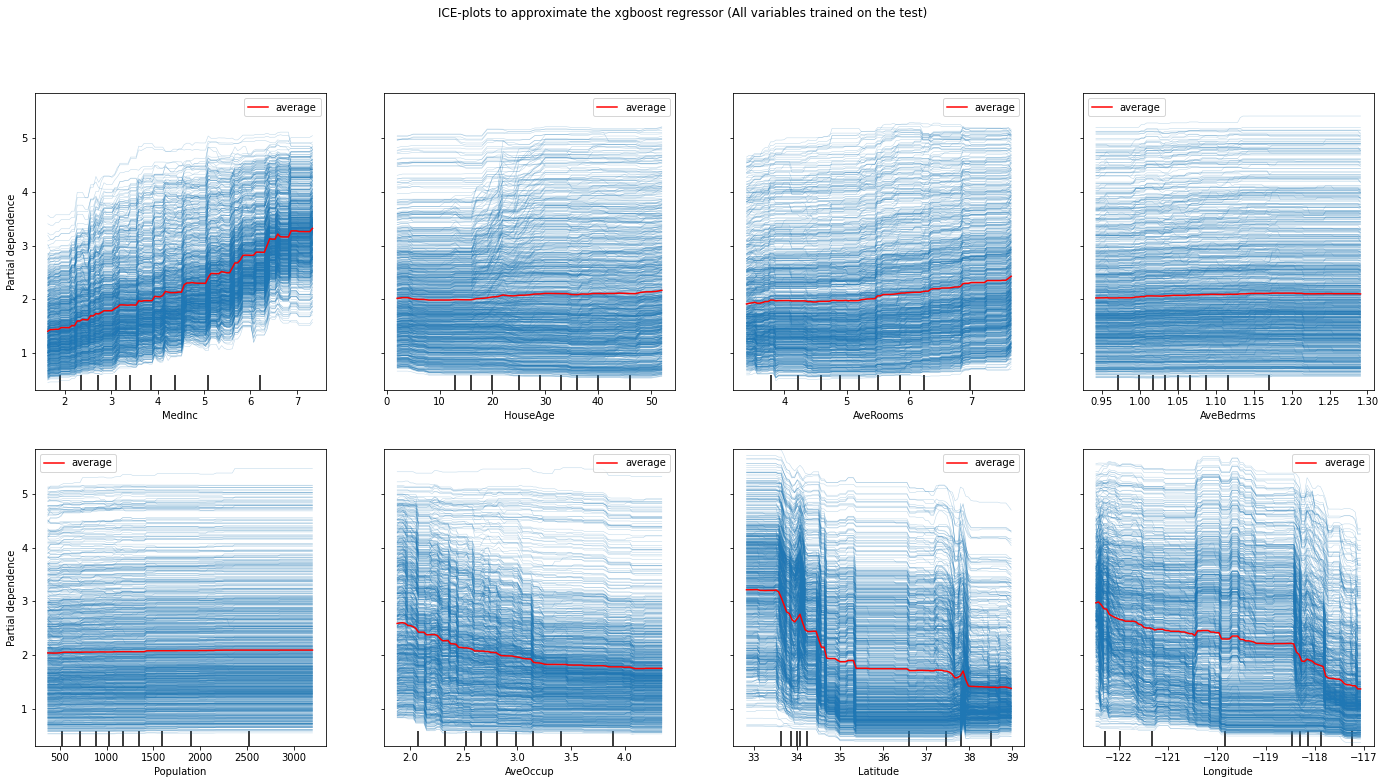

In [13]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(nrows = 2, ncols = 4,figsize=(24, 12))
PartialDependenceDisplay.from_estimator(estimator = model, X = X_test,
                                        features = X_test.columns,
                                        feature_names = cal_housing.feature_names, 
                                        kind = 'both',pd_line_kw = {"color": "red"},
                                        ax = ax)
plt.suptitle("ICE-plots to approximate the xgboost regressor (All variables trained on the test)")
plt.show()

**Bonus:** Modify the predict function of the trained model to produce a c-ICE for the feature `MedInc`.

In [45]:
pred_fn = model.predict

In [46]:
import sys
sys.setrecursionlimit(5000)

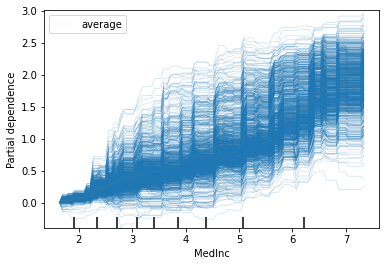

In [53]:
My_x = X_test.copy()
q_5 = My_x.quantile(0.05)[0] # anchor at 5th percentile
My_x.MedInc = q_5
constant = pred_fn(My_x)

def new_predict(My_x):
  pred = pred_fn(My_x) - constant
  return pred

model.predict = new_predict 
PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    ["MedInc"],
    kind = "both",
    line_kw = {"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    pd_line_kw = {"color": "tab:orange", "alpha": 0.3, "linewidth": 0.3}
)
